<a href="https://colab.research.google.com/github/DOMINION-JOHN1/bad-insurance-prediction/blob/main/insurance_debt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [ ]:
df1 = pd.read_excel('AllClientDetails(WriteOff).xlsx')
df2 = pd.read_excel('/content/baddebt.xlsx')


In [ ]:

# Merge the datasets
result = pd.merge(df1, df2, on='Ref@', how='left', indicator=True)

# Create a new column 'debt' based on the merge indicator
result['debt'] = result['_merge'].map({'both': 'bad debt', 'left_only': 'good debt', 'right_only': 'good debt'})

# Remove the merge indicator column
result.drop(columns=['_merge'], inplace=True)

In [ ]:
result

,ClientRef@_x,Ref@,Name_x,Pcode_x,Title_x,Forenames_x,Dob_x,Sex_x,mar_x,Odesc_x,...,Name_y,Pcode_y,Title_y,Forenames_y,Dob_y,Sex_y,mar_y,Odesc_y,Cust_class_y,debt
0,AAAS05,AAAS05,Aaas Security Company Ltd,RM18 8RH,Mr Yasin,Waqas,1980-12-20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,good debt
1,AAAS06,AAAS06,Mr Amad Ali,BD5 9HH,Mr Ali,Amad,2001-08-21,Male,Single,Line Manager,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,good debt
2,AACO02,AACO02,AA COURIER&REMOVAL LTD,DA7 6AS,Mr Istrate,Alexandru,1988-07-02,Male,Married,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,good debt
3,AADX01,AADX01,Mr Daniel Aanei,BS10 7DS,Mr Aanei,Daniel,1990-10-01,Male,Single,Courier,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,good debt
4,AAFI01,AAFI01,Aa Fina Ltd,SK10 1EB,Mr Pogacar,Ales,1977-07-24,NaN,NaN,Restaurant,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,good debt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21925,ZUVX03,ZUVX03,Mr Vitalijus Zukauskas,KT5 8DQ,Mr Zukauskas,Vitalijus,1983-08-22,Male,Separated,Furniture Remover,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,good debt
21926,ZVDX01,ZVDX01,Mr David Zvikler,M25 0AN,Mr Zvikler,David,1963-08-09,Male,Divorced,Company Director,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,good debt
21927,ZWVX01,ZWVX01,Mr Phillemon Vusumuzi Zwane,RH11 0JP,Mr Zwane,Phillemon Vusumuzi,1966-11-14,Male,Single,Courier,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,good debt
21928,ZYMV01,ZYMV01,Mr Marius Van Zyl,RH6 8AG,Mr Van Zyl,Marius,1974-03-04,Male,Cohabiting,Courier,...,Mr Marius Van Zyl,RH6 8AG,Mr Van Zyl,Marius,1974-03-04,Male,Cohabiting,Courier,Mixed,bad debt


In [ ]:
result.isna().sum()

ClientRef@_x        0
Ref@                0
Name_x              1
Pcode_x             0
Title_x             0
Forenames_x         3
Dob_x               5
Sex_x            4187
mar_x            5335
Odesc_x          7677
Cust_class_x        0
ClientRef@_y    19445
Name_y          19446
Pcode_y         19445
Title_y         19445
Forenames_y     19445
Dob_y           19445
Sex_y           19754
mar_y           19774
Odesc_y         19978
Cust_class_y    19445
debt                0
dtype: int64

In [ ]:
def determine_sex(title):
    if title[:3] == 'Mr ':
        return 'Male'
    elif title[:3] in ['Mrs', 'Mis']:
        return 'Female'
    else:
        return None  # Handle other cases if needed

# Apply the function to create the Sex_x column
result['Sex_x'] = result['Title_x'].apply(determine_sex)

print(result)

      ClientRef@_x    Ref@                       Name_x   Pcode_x  \
0           AAAS05  AAAS05    Aaas Security Company Ltd  RM18 8RH   
1           AAAS06  AAAS06                  Mr Amad Ali   BD5 9HH   
2           AACO02  AACO02       AA COURIER&REMOVAL LTD   DA7 6AS   
3           AADX01  AADX01              Mr Daniel Aanei  BS10 7DS   
4           AAFI01  AAFI01                  Aa Fina Ltd  SK10 1EB   
...            ...     ...                          ...       ...   
21925       ZUVX03  ZUVX03       Mr Vitalijus Zukauskas   KT5 8DQ   
21926       ZVDX01  ZVDX01             Mr David Zvikler   M25 0AN   
21927       ZWVX01  ZWVX01  Mr Phillemon Vusumuzi Zwane  RH11 0JP   
21928       ZYMV01  ZYMV01            Mr Marius Van Zyl   RH6 8AG   
21929       ZYRX01  ZYRX01               Mr Rafal Zywot   OX3 8BG   

            Title_x         Forenames_x      Dob_x Sex_x       mar_x  \
0          Mr Yasin               Waqas 1980-12-20  Male         NaN   
1            Mr Ali        

In [ ]:
result.drop(columns=['Name_y',	'Pcode_y','ClientRef@_y',	'Title_y',	'Forenames_y',	'Dob_y',	'Sex_y',	'mar_y',	'Odesc_y',	'Cust_class_y','ClientRef@_x','Ref@',	'Name_x',	'Title_x',	'Forenames_x'], inplace=True	)

In [ ]:
result.isna().sum()

Pcode_x            0
Dob_x              5
Sex_x           2248
mar_x           5335
Odesc_x         7677
Cust_class_x       0
debt               0
dtype: int64

In [ ]:
result.dropna(inplace=True)

In [ ]:
result['postcode'] = result['Pcode_x'].str[:2]

# Display the updated DataFrame
print(result)

        Pcode_x      Dob_x Sex_x       mar_x            Odesc_x Cust_class_x  \
1       BD5 9HH 2001-08-21  Male      Single       Line Manager     Consumer   
3      BS10 7DS 1990-10-01  Male      Single            Courier        Mixed   
6      HP13 6GR 1983-05-26  Male      Single  Furniture Remover        Mixed   
8       SE9 1TD 1990-08-10  Male     Married            Courier        Mixed   
10      ST1 4BS 1998-05-09  Male      Single          Librarian     Consumer   
...         ...        ...   ...         ...                ...          ...   
21925   KT5 8DQ 1983-08-22  Male   Separated  Furniture Remover        Mixed   
21926   M25 0AN 1963-08-09  Male    Divorced   Company Director        Mixed   
21927  RH11 0JP 1966-11-14  Male      Single            Courier        Mixed   
21928   RH6 8AG 1974-03-04  Male  Cohabiting            Courier        Mixed   
21929   OX3 8BG 1969-11-23  Male     Married            Courier        Mixed   

            debt postcode  
1      good

In [ ]:
result['postcode'].nunique()

193

In [ ]:
result.drop(columns=['Pcode_x'], inplace=True	)
result

,Dob_x,Sex_x,mar_x,Odesc_x,Cust_class_x,debt,postcode
1,2001-08-21,Male,Single,Line Manager,Consumer,good debt,BD
3,1990-10-01,Male,Single,Courier,Mixed,good debt,BS
6,1983-05-26,Male,Single,Furniture Remover,Mixed,good debt,HP
8,1990-08-10,Male,Married,Courier,Mixed,good debt,SE
10,1998-05-09,Male,Single,Librarian,Consumer,bad debt,ST
...,...,...,...,...,...,...,...
21925,1983-08-22,Male,Separated,Furniture Remover,Mixed,good debt,KT
21926,1963-08-09,Male,Divorced,Company Director,Mixed,good debt,M2
21927,1966-11-14,Male,Single,Courier,Mixed,good debt,RH
21928,1974-03-04,Male,Cohabiting,Courier,Mixed,bad debt,RH


In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11510 entries, 1 to 21929
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dob_x         11510 non-null  datetime64[ns]
 1   Sex_x         11510 non-null  object        
 2   mar_x         11510 non-null  object        
 3   Odesc_x       11510 non-null  object        
 4   Cust_class_x  11510 non-null  object        
 5   debt          11510 non-null  object        
 6   postcode      11510 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 719.4+ KB


In [ ]:
# Convert the 'dob' column to datetime format
result['Dob_x'] = pd.to_datetime(result['Dob_x'])

# Calculate age
now = datetime.now()
result['age'] = (now - result['Dob_x']).astype('<m8[Y]')

In [ ]:
result.drop(columns=['Dob_x'], inplace=True	)

In [ ]:
columns_to_convert = [ 'postcode', 'Sex_x', 'mar_x', 'Odesc_x', 'Cust_class_x','debt']

# Convert columns to categorical data typecolumns_to_convert
result[columns_to_convert] = result[columns_to_convert].astype('category')

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11510 entries, 1 to 21929
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sex_x         11510 non-null  category
 1   mar_x         11510 non-null  category
 2   Odesc_x       11510 non-null  category
 3   Cust_class_x  11510 non-null  category
 4   debt          11510 non-null  category
 5   postcode      11510 non-null  category
 6   age           11510 non-null  float64 
dtypes: category(6), float64(1)
memory usage: 297.2 KB


In [ ]:
result

,Sex_x,mar_x,Odesc_x,Cust_class_x,debt,postcode,age
1,Male,Single,Line Manager,Consumer,good debt,BD,22.0
3,Male,Single,Courier,Mixed,good debt,BS,33.0
6,Male,Single,Furniture Remover,Mixed,good debt,HP,40.0
8,Male,Married,Courier,Mixed,good debt,SE,33.0
10,Male,Single,Librarian,Consumer,bad debt,ST,25.0
...,...,...,...,...,...,...,...
21925,Male,Separated,Furniture Remover,Mixed,good debt,KT,40.0
21926,Male,Divorced,Company Director,Mixed,good debt,M2,60.0
21927,Male,Single,Courier,Mixed,good debt,RH,57.0
21928,Male,Cohabiting,Courier,Mixed,bad debt,RH,50.0


<Axes: xlabel='age'>

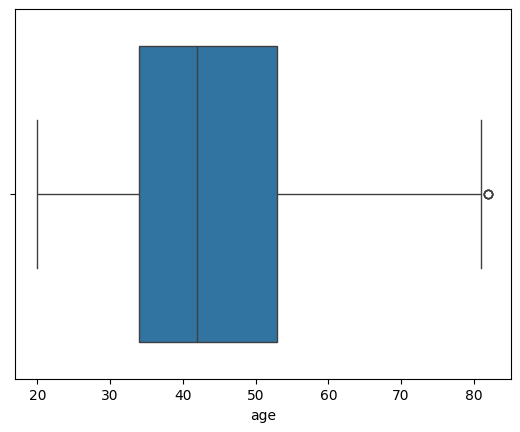

In [ ]:
sns.boxplot(x='age', data=result)

In [ ]:

scaler = RobustScaler()
result['age'] = scaler.fit_transform(result[['age']])


In [ ]:
result

,Sex_x,mar_x,Odesc_x,Cust_class_x,debt,postcode,age
1,Male,Single,Line Manager,Consumer,good debt,BD,-1.052632
3,Male,Single,Courier,Mixed,good debt,BS,-0.473684
6,Male,Single,Furniture Remover,Mixed,good debt,HP,-0.105263
8,Male,Married,Courier,Mixed,good debt,SE,-0.473684
10,Male,Single,Librarian,Consumer,bad debt,ST,-0.894737
...,...,...,...,...,...,...,...
21925,Male,Separated,Furniture Remover,Mixed,good debt,KT,-0.105263
21926,Male,Divorced,Company Director,Mixed,good debt,M2,0.947368
21927,Male,Single,Courier,Mixed,good debt,RH,0.789474
21928,Male,Cohabiting,Courier,Mixed,bad debt,RH,0.421053


<Axes: xlabel='debt', ylabel='count'>

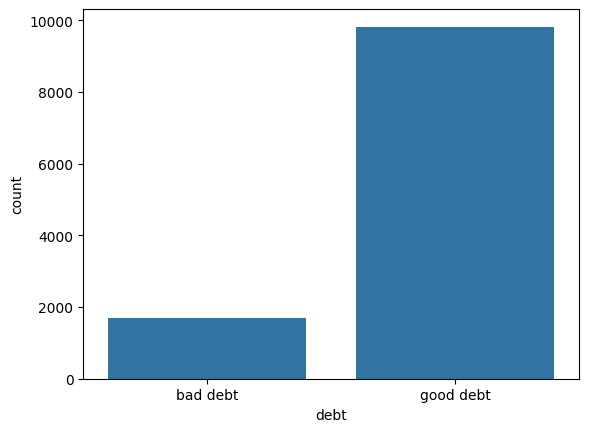

In [ ]:
sns.countplot(x='debt', data=result)

In [ ]:
x=result.drop(columns=['debt'])
y= result['debt']

In [ ]:
from imblearn.over_sampling import SMOTENC



In [ ]:


# ssuming X contains all the features including 'age'
# and y contains the target variable
# Specify the categorical features indices
categorical_features_indices = [i for i, col in enumerate(x.columns) if col != 'age']

# Initialize SMOTENC with the specified categorical features
smote_nc = SMOTENC(categorical_features=categorical_features_indices, sampling_strategy='minority')

# Fit and resample the data
X,Y = smote_nc.fit_resample(x, y)


In [ ]:
(Y== 'bad debt').shape[0]

19644

In [ ]:
Y.shape[0]

19644

<Axes: xlabel='debt', ylabel='count'>

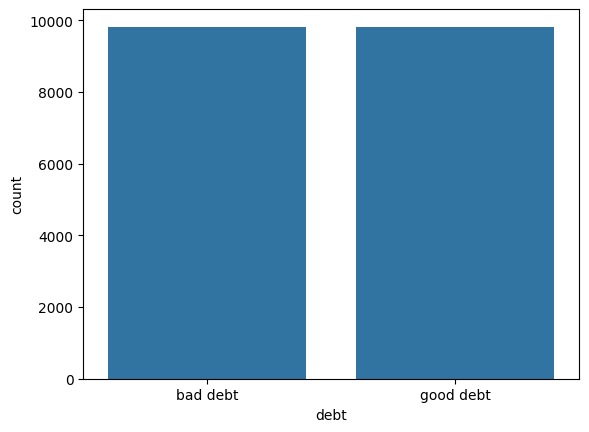

In [ ]:
sns.countplot(x=Y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=1500,
    depth=14,
    learning_rate=0.005,
    loss_function='Logloss',
    verbose=True
)
model.fit(x_train, y_train,cat_features=['Sex_x', 'mar_x', 'Odesc_x', 'Cust_class_x', 'postcode'])
_
y_pred = model.predict(x_test)

0:	learn: 0.6916795	total: 873ms	remaining: 21m 49s
1:	learn: 0.6902140	total: 1.74s	remaining: 21m 41s
2:	learn: 0.6890934	total: 1.77s	remaining: 14m 45s
3:	learn: 0.6875525	total: 2.65s	remaining: 16m 31s
4:	learn: 0.6861190	total: 3.5s	remaining: 17m 26s
5:	learn: 0.6845378	total: 4.35s	remaining: 18m 3s
6:	learn: 0.6829469	total: 5.47s	remaining: 19m 26s
7:	learn: 0.6813712	total: 6.69s	remaining: 20m 48s
8:	learn: 0.6797508	total: 7.55s	remaining: 20m 50s
9:	learn: 0.6782714	total: 8.37s	remaining: 20m 46s
10:	learn: 0.6768984	total: 9.16s	remaining: 20m 40s
11:	learn: 0.6759540	total: 9.18s	remaining: 18m 58s
12:	learn: 0.6743154	total: 10s	remaining: 19m 3s
13:	learn: 0.6724618	total: 10.8s	remaining: 19m 9s
14:	learn: 0.6711641	total: 11s	remaining: 18m 4s
15:	learn: 0.6695753	total: 11.8s	remaining: 18m 15s
16:	learn: 0.6680530	total: 12.7s	remaining: 18m 25s
17:	learn: 0.6666119	total: 13.5s	remaining: 18m 30s
18:	learn: 0.6653230	total: 14.3s	remaining: 18m 37s
19:	learn: 0

In [ ]:
y_pred

In [ ]:
# Import necessary functions for performance evaluation
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    bad debt       0.86      0.77      0.81      2146
   good debt       0.75      0.86      0.80      1783

    accuracy                           0.81      3929
   macro avg       0.81      0.81      0.81      3929
weighted avg       0.81      0.81      0.81      3929



In [ ]:
x_test

,Sex_x,mar_x,Odesc_x,Cust_class_x,postcode,age
10682,Male,Single,Courier,Mixed,E1,1.210526
16505,Male,Single,Courier,Mixed,NR,-0.464810
7715,Male,Single,Customer Service Con,Consumer,WD,-0.789474
9258,Male,Single,Courier,Mixed,S9,-0.473684
14263,Male,Married,Courier,Mixed,BH,0.105263
...,...,...,...,...,...,...
7298,Male,Married,Courier,Mixed,LU,-0.157895
1773,Female,Separated,Courier,Mixed,G1,1.210526
14043,Male,Cohabiting,Courier,Mixed,B2,0.090776
12129,Male,Married,Courier,Mixed,PE,-0.052632


In [ ]:
info=['Male',	'Cohabiting',	'Council Worker',	'Consumer',	'CR',	-0.684211]
model.predict(info)


'good debt'

In [ ]:
y_test

10682    good debt
16505     bad debt
7715     good debt
9258     good debt
14263     bad debt
           ...    
7298     good debt
1773      bad debt
14043     bad debt
12129     bad debt
7803     good debt
Name: debt, Length: 3929, dtype: category
Categories (2, object): ['bad debt', 'good debt']

In [ ]:
# Optionally, get feature importances:
feature_importances = model.feature_importances_

# Print the most important features (optional)
print("Top 5 most important features:")
for feature, importance in sorted(zip(model.feature_names_, feature_importances), reverse=True)[:5]:
    print(f"{feature}: {importance:.4f}")

Top 5 most important features:
postcode: 27.5814
mar_x: 20.2626
age: 15.6652
Sex_x: 2.4876
Odesc_x: 15.8917


In [ ]:
# Save the model to a file
model.save_model('catboost_model.bin')

In [ ]:

from google.colab import files

files.download('catboost_model.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>